In [1]:
import os

In [2]:
os.environ['PROJ_LIB'] = '/Users/patricksaul/anaconda3/share/proj'

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [4]:
import io
import requests

# Import Unreached Base File

In [5]:
url = "https://joshuaproject.net/resources/datasets/1"
response = requests.get(url)

In [6]:
open('unreached.csv','wb').write(response.content)

3999030

In [7]:
ur_df = pd.read_csv('unreached.csv', low_memory=False,skiprows=1)

In [8]:
ur_df.head()

,ROG3,Ctry,PeopleID3,ROP3,PeopNameAcrossCountries,PeopNameInCountry,Population,JPScale,LeastReached,ROL3,...,RegionCode,RegionName,ROG2,Continent,10_40Window,IndigenousCode,WorkersNeeded,Frontier,Latitude,Longitude
0,AF,Afghanistan,14372.0,107989.0,"Afghan, Tajik","Afghan, Tajik",10485000.0,1.0,Y,prs,...,5.0,"Asia, Central",ASI,Asia,Y,Y,210.0,Y,31.156210,62.146120
1,AF,Afghanistan,19409.0,100096.0,Afshari,Afshari,15000.0,1.0,Y,azb,...,5.0,"Asia, Central",ASI,Asia,Y,N,1.0,Y,34.447960,69.289760
2,AF,Afghanistan,21454.0,118270.0,Aimaq,Aimaq,1595000.0,1.0,Y,aiq,...,5.0,"Asia, Central",ASI,Asia,Y,Y,32.0,Y,35.005010,63.128594
3,AF,Afghanistan,15741.0,110448.0,"Americans, U.S.","Americans, U.S.",10000.0,5.0,N,eng,...,5.0,"Asia, Central",ASI,Asia,Y,N,NaN,N,34.528621,69.168549
4,AF,Afghanistan,16221.0,111334.0,Ansari,Ansari,2400.0,1.0,Y,urd,...,5.0,"Asia, Central",ASI,Asia,Y,N,1.0,Y,34.547770,69.319800


In [9]:
ur_df.describe()

,PeopleID3,ROP3,Population,JPScale,BibleStatus,RLG3,PercentAdherents,PercentEvangelical,PeopleID1,PeopleID2,CountOfCountries,RegionCode,WorkersNeeded,Latitude,Longitude
count,17423.000000,17357.000000,1.740200e+04,17423.000000,17423.000000,17423.000000,17423.000000,16080.000000,17423.000000,17423.000000,17423.000000,17423.000000,7395.000000,17423.000000,17423.000000
mean,15176.984733,108723.202973,4.454642e+05,2.672444,3.744935,3.368938,37.253538,6.172445,18.415887,282.761063,12.605464,6.034552,9.228668,17.061216,45.142436
std,3287.149267,5166.987657,7.504025e+06,1.619492,1.625274,2.190771,39.336351,10.139358,4.051574,114.726575,31.024568,3.406888,66.128802,20.981521,69.467201
min,10119.000000,100004.000000,1.000000e+01,1.000000,0.000000,1.000000,0.000000,0.000000,10.000000,100.000000,1.000000,1.000000,1.000000,-54.936963,-179.305780
25%,12253.500000,104002.000000,2.200000e+03,1.000000,3.000000,1.000000,0.000000,0.000000,16.000000,181.000000,1.000000,4.000000,1.000000,2.819830,8.587909
50%,14831.000000,108636.000000,1.200000e+04,3.000000,4.000000,4.000000,15.000000,1.200000,20.000000,269.000000,2.000000,5.000000,1.000000,17.821340,51.469826
75%,17933.500000,113068.000000,7.000000e+04,4.000000,5.000000,5.000000,80.000000,8.000000,21.000000,402.000000,6.000000,9.000000,2.000000,30.469190,91.799116
max,21846.000000,118620.000000,8.700490e+08,5.000000,5.000000,9.000000,100.000000,95.000000,26.000000,479.000000,216.000000,12.000000,2705.000000,78.210945,179.249850


# Map Visualization

In [10]:
lat = ur_df['Latitude'].values
lon = ur_df['Longitude'].values

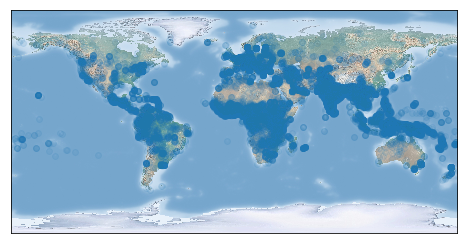

In [14]:
# Following based on https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
# 1. Draw the map background
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
m.shadedrelief()
# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True, alpha=0.1)

#  To be adapted:

# # 3. create colorbar and legend
# plt.colorbar(label=r'$\log_{10}({\rm population})$')
# plt.clim(3, 7)

# # make legend with dummy points
# for a in [100, 300, 500]:
#     plt.scatter([], [], c='k', alpha=0.5, s=a,
#                 label=str(a) + ' km$^2$')
# plt.legend(scatterpoints=1, frameon=False,
#            labelspacing=1, loc='lower left');